# Multiclass Classification - a Simple Keras Model (MNIST)
Adapted from [Chollet notebook 2](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter02_mathematical-building-blocks.ipynb).
Presented here in accordance with the MIT license.

The objectives of this notebooks are:
1. Get to know the Keras framework and how it corresponds to the Tensorflow API, specifically:
     * `keras.Sequential` - define a sequential model
     * `model.compile` - config the model, e.g. with losses and metrics
     * `model.fit` - train the model
     * `model.predict` - run inference with the model
     * `tf.keras.models.save_model`
2. `softmax` 
3. `sparse_categorical_crossentropy`

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

## Get the Data

* Here we will use [tensorflow.keras.datasets](https://keras.io/api/datasets/) as our data repository. It provides API access to a collection of a few toy datasets (in numpy format) that can be used to train and test simple models.
* [MNIST](https://keras.io/api/datasets/mnist/) is a dataset of 60,000 28x28 grayscale images of the 10 digits (0-9), along with a test set of 10,000 images.

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Data Exploration

In [3]:
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')  # the text images should be a random sample of the overall test set, and hence should have the same type, shape and image-size as the overall train set
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


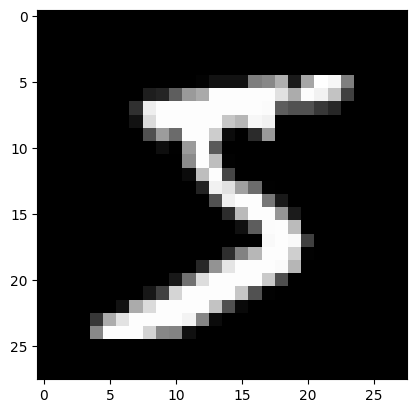

In [4]:
# plot the first image in the training set in grayscale
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap='gray')  # to understand how a matrix of numbers is converted to an image, have a look at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

In [5]:
# print the label of the first image in the training set   
print(f'Label: {train_labels[0]}')

Label: 5


* To get familiar with the data, print out the first 5 images and labels in the training set and the first 5 images and labels in the test set
* Run the `imshow` below without the `cmap='gray'` argument, and see what happens
* What additional data explorations would you like to test, and what would be the motivation for each?
* What is the distribution of the labels in the training set? What is the distribution of the labels in the test set?
* What is the distribution of the pixel values in the training set? What is the distribution of the pixel values in the test set?

## Data preprocessing

In [6]:
train_images = train_images.reshape((60000, 28 * 28))  # flattening the 28x28 image into dim=1 (784,) vector (and over all images in the training set)
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype("float32") / 255  # normalizing the data to the range [0,1] by min-max range, and casting it to float32
test_images = test_images.astype("float32") / 255

In [7]:
print(train_images.min())
print(train_images.max())
print(train_images.shape)
print(train_images[0].shape)

0.0
1.0
(60000, 784)
(784,)


Notice that despite the normalization, the image is still the same (this is a matplotlib feature, to read more see imshow documentation):

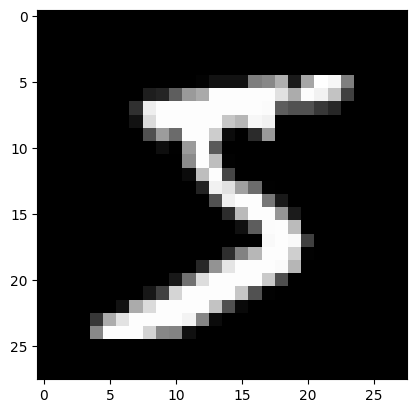

In [8]:
plt.imshow(train_images[0].reshape(28,28), cmap='gray')

## Define the model
How many neurons does each layer have?

In [9]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

## Define the Loss Function, Optimizer and Metrics

In [10]:
model.compile(optimizer="rmsprop",  # RMSProp is discussed in the Optimizers section
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## Training ("Fitting") the model

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2615 - accuracy: 0.9249
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1064 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0703 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0505 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0375 - accuracy: 0.9889


## Inference: Using the Model to Make Predictions

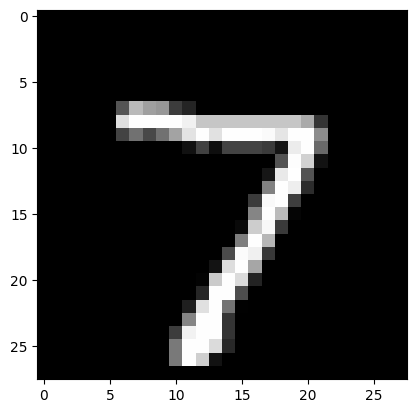

In [12]:
plt.imshow(test_images[0].reshape(28,28), cmap='gray')  # the actual image

In [13]:
# a note on shapes: the model expects a 2D array of shape (batch_size, input_dim), so we need to reshape the test image to (1, 784)
# Compare:
print(test_images[0].shape)  # this will through an error (since it is a 1d array)
print(test_images[0:1].shape)  # this is a correct shape (2d)

(784,)
(1, 784)


In [14]:
prediction = model.predict(test_images[0:1])  # the notation `[0:1]` is used to get the first element of the array, but in the desired shape of (None, 784). `None` in Tensorflow means any number of elements, and is used to indicate that the shape is dynamic (i.e. it can be any number of instances)  

1/1 [==============================] - 0s 69ms/step


In [15]:
prediction  # 10 classes, each with a probability

array([[9.8128169e-08, 9.0265644e-09, 4.3288714e-05, 5.1205739e-04,
        2.7775853e-11, 2.1021775e-07, 2.2657282e-11, 9.9941480e-01,
        5.5275332e-06, 2.3994096e-05]], dtype=float32)

In [16]:
prediction.argmax()  # the class with the highest probability

7

In [17]:
prediction[0, 7]  # the probability of the 7th class (of the zeroth data instance)

0.9994148

In [18]:
test_labels[0]  # the actual label


7

## Evaluating the Model with the Test Data

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9790
test_acc: 0.9789999723434448


## Saving the Model for Future Use
 This allows using the model for future inference, serving or re-training.

In [23]:
# Saving with Keras, default `.pb` format
tf.keras.models.save_model(model, './mnist_model/keras_pb/')

INFO:tensorflow:Assets written to: ./mnist_model/keras_pb/assets


INFO:tensorflow:Assets written to: ./mnist_model/keras_pb/assets


In [24]:
# Saving with Keras, default `.pb` format, and without the optimizer
tf.keras.models.save_model(model, './mnist_model/keras_pb_no_optimizer/', include_optimizer=False)

INFO:tensorflow:Assets written to: ./mnist_model/keras_pb_no_optimizer/assets


INFO:tensorflow:Assets written to: ./mnist_model/keras_pb_no_optimizer/assets


In [25]:
# Saving with Keras an h5
tf.keras.models.save_model(model, './mnist_model/keras_h5/model.h5', save_format='h5')

In [26]:
# Saving with Tensorflow
tf.saved_model.save(model, './mnist_model/tf/')

INFO:tensorflow:Assets written to: ./mnist_model/tf/assets


INFO:tensorflow:Assets written to: ./mnist_model/tf/assets
